In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
mnist_data=mnist.load_data()

Using TensorFlow backend.


This is an 3 (From train : True)


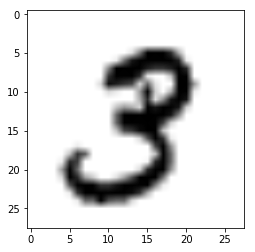

In [2]:
def print_a_sample(position,isTrain=True):
    source=1
    if isTrain:
        source=0
    sample_image=mnist_data[source][0][position]
    sample_label=mnist_data[source][1][position]
    plt.imshow(sample_image, cmap=plt.cm.binary,interpolation='bilinear');
    print("This is an {0} (From train : {1})".format(sample_label, isTrain))

print_a_sample(5001)

In [3]:
(train_images,train_labels),(test_images,test_labels)=mnist_data
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)
print(test_labels[1])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
2


In [4]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [5]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [7]:
print(train_images.shape,test_labels.shape,test_images.shape,test_labels.shape)

(60000, 784) (10000,) (10000, 784) (10000,)


In [8]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
network.fit(train_images,train_labels,epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0082 - acc: 0.9976
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0058 - acc: 0.9983
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0050 - acc: 0.9985
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0037 - acc: 0.9990
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0030 - acc: 0.9992
